In [1]:
import pandas as pd
from scipy.stats import chi2_contingency
from matplotlib import pyplot as plt

In [2]:
th_df = pd.read_csv("data/th.csv")
ct_table_full = pd.crosstab(th_df["Episode"], th_df["Value"])

# Groups partial /f,v/ with /θ,ð/
th_df["counting_partial"] = th_df["Value"].str.contains("θ|Partial")
ct_table_counting = pd.crosstab(th_df["Episode"], th_df["counting_partial"])
ct_table_counting.rename({True: "/θ,ð/ + Partial /f,v/", False: "/f,v/"}, axis='columns', inplace=True)

# Groups partial /f,v/ with /f,v/
th_df["excluding_partial"] = th_df["Value"].str.contains("f")
ct_table_excluding = pd.crosstab(th_df["Episode"], th_df["excluding_partial"])
ct_table_excluding.rename({True: "/f,v/ + Partial /f,v/", False: "/θ,ð/"}, axis='columns', inplace=True)

## /θ,ð/ vs partial /f,v/ vs /f,v/

In [3]:
chi2_stat_full, p_full, dof_full, expected_full = chi2_contingency(ct_table_full)

print(f"chi2 statistic:     {chi2_stat_full:.5g}")
print(f"p-value:            {p_full:.5g}")
print(f"degrees of freedom: {dof_full}")
print("expected frequencies:\n",expected_full)

chi2 statistic:     13.678
p-value:            0.0083984
degrees of freedom: 4
expected frequencies:
 [[  9.30792683  48.05487805  13.63719512]
 [ 10.75        55.5         15.75      ]
 [ 22.94207317 118.44512195  33.61280488]]


## Grouping partial /f,v/ with /θ,ð/

In [4]:
chi2_stat_counting, p_counting, dof_counting, expected_counting = chi2_contingency(ct_table_counting)

print(f"chi2 statistic:     {chi2_stat_counting:.5g}")
print(f"p-value:            {p_counting:.5g}")
print(f"degrees of freedom: {dof_counting}")
print("expected frequencies:\n",expected_counting)

chi2 statistic:     10.898
p-value:            0.0043
degrees of freedom: 2
expected frequencies:
 [[  9.30792683  61.69207317]
 [ 10.75        71.25      ]
 [ 22.94207317 152.05792683]]


## Grouping partial /f,v/ with /f,v/

In [5]:
chi2_stat_exc, p_exc, dof_exc, expected_exc = chi2_contingency(ct_table_excluding)

print(f"chi2 statistic:     {chi2_stat_exc:.5g}")
print(f"p-value:            {p_exc:.5g}")
print(f"degrees of freedom: {dof_exc}")
print("expected frequencies:\n",expected_exc)

chi2 statistic:     7.6785
p-value:            0.021509
degrees of freedom: 2
expected frequencies:
 [[ 48.05487805  22.94512195]
 [ 55.5         26.5       ]
 [118.44512195  56.55487805]]


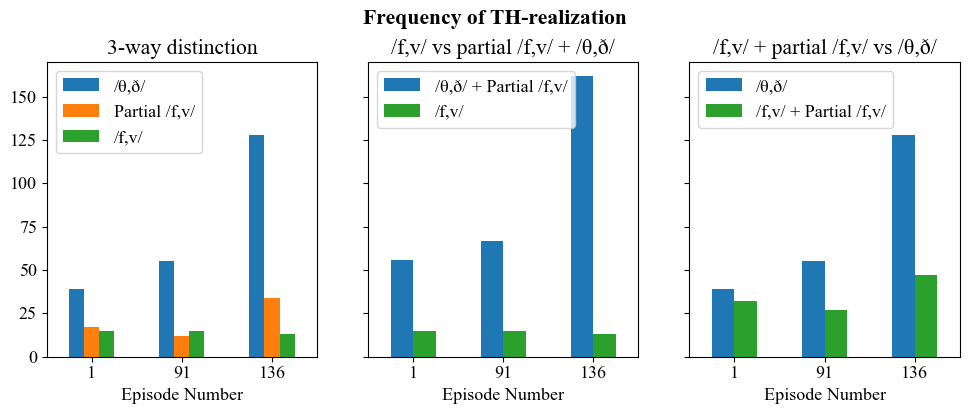

In [31]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 13})

fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(10,4))
fig.tight_layout()

ct_table_full.index = ct_table_full.index.astype('int32')
ct_table_counting.index = ct_table_counting.index.astype('int32')
ct_table_excluding.index = ct_table_excluding.index.astype('int32')

ct_table_full = ct_table_full[["/θ,ð/", "Partial /f,v/", "/f,v/"]]
ct_table_counting = ct_table_counting[["/θ,ð/ + Partial /f,v/", "/f,v/"]]
ct_table_excluding = ct_table_excluding[["/θ,ð/", "/f,v/ + Partial /f,v/"]]

ct_table_full.plot(kind="bar", rot=0, ax=axs[0])
ct_table_counting.plot(kind="bar", rot=0, ax=axs[1], color = ['tab:blue', 'tab:green'])
ct_table_excluding.plot(kind="bar", rot=0, ax=axs[2], color = ['tab:blue', 'tab:green'])

axs[0].set_title("3-way distinction")
axs[1].set_title("/f,v/ vs partial /f,v/ + /θ,ð/")
axs[2].set_title("/f,v/ + partial /f,v/ vs /θ,ð/")

axs[0].legend(loc='upper left')
axs[1].legend(loc='upper left')
axs[2].legend(loc='upper left')

for ax in axs:
    ax.set_xlabel("Episode Number")

fig.subplots_adjust(top=0.85)
plt.suptitle("Frequency of TH-realization",fontweight='bold')
fig.savefig("frequency.pdf")
# plt.xlabel("Episode Number")

In [35]:
ct_table_counting

counting_partial,False,True
Episode,,
1,15,56
91,15,67
136,6,40


In [58]:
ct_table_counting[False]

Episode
1      15
91     15
136     6
Name: False, dtype: int64